In [1]:
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def plot_file(file):
    configs, n_params_, losses_accs_ = load(open(file, 'rb'))

    losses_accs_df = list(map(lambda x: pd.DataFrame(x), losses_accs_))

    configs_df = pd.DataFrame(configs)

    heads = [2, 4, 8]
    depth = [2, 4, 8,]
    
    for dropout in [.2, .4]:
        for emb_dropout in [0, .2, .4]:
            for dim_head in [32, 64, 128]:

                scores_val64 = np.zeros((3,3))
                scores_test64 = np.zeros((3,3))
                scores_val = np.zeros((3,3))
                scores_test = np.zeros((3,3))

                for i, config in enumerate(configs):
                    if config['dim_head'] == dim_head and config['dim'] == 64 and config['dropout'] == dropout and config['emb_dropout'] == emb_dropout:
                        scores_val64[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()
                        scores_test64[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]
                    if config['dim_head'] == dim_head and config['dim'] == 14*20 and config['dropout'] == dropout and config['emb_dropout'] == emb_dropout:
                        scores_val[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()
                        scores_test[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]

                fig, axes = plt.subplots(figsize=(8*2, 4), ncols=4)
                print(scores_test)
                for idx, scores in enumerate([scores_val64, scores_test64, scores_val, scores_test]):
                    ax = axes[idx]
                    m = ax.imshow(scores, interpolation='nearest',  vmin=.5, vmax=.85)#cmap=plt.cm.hot)
                    ax.set_ylabel('heads')
                    ax.set_xlabel('depth')

                    ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(len(heads))))
                    ax.xaxis.set_major_formatter(ticker.FixedFormatter(heads))
                    ax.yaxis.set_major_locator(ticker.FixedLocator(np.arange(len(depth))))
                    ax.yaxis.set_major_formatter(ticker.FixedFormatter(depth))

                    ax.set_title(f'{"Training" if idx % 2 == 0 else "Test"}\ndim_head={dim_head},dim={64 if idx < 2 else 14*20}\nhidden=2*dim')
                    for i in range(len(heads)):
                        for j in range(len(depth)):
                            text = ax.text(j, i, f"{scores[i, j]*100:.2f}%",
                                           ha="center", va="center", color="w")

                fig.subplots_adjust(right=0.8)
                cbar_ax = fig.add_axes([0.85, 0.1, 0.015, 0.85])
                fig.colorbar(m, cax=cbar_ax)
                
                print("Dropout", dropout, "emb_dropout", emb_dropout)
                plt.show()

In [3]:
def plot_file_epoch(file):
    configs, n_params_, losses_accs_ = load(open(file, 'rb'))

    losses_accs_df = list(map(lambda x: pd.DataFrame(x), losses_accs_))

    configs_df = pd.DataFrame(configs)

    heads = [2, 4, 8]
    depth = [2, 4, 8,]
    
    for dropout in [.2, .4]:
        for emb_dropout in [0, .2, .4]:
            for dim_head in [32, 64, 128]:

                scores_val64 = np.zeros((3,3))
                scores_test64 = np.zeros((3,3))
                scores_val = np.zeros((3,3))
                scores_test = np.zeros((3,3))

                for i, config in enumerate(configs):
                    if config['dim_head'] == dim_head and config['dim'] == 64 and config['dropout'] == dropout and config['emb_dropout'] == emb_dropout:
                        scores_val64[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.argmax()
                        scores_test64[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]
                    if config['dim_head'] == dim_head and config['dim'] == 14*20 and config['dropout'] == dropout and config['emb_dropout'] == emb_dropout:
                        scores_val[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.argmax()
                        scores_test[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]

                fig, axes = plt.subplots(figsize=(8*2, 4), ncols=4)
                print(scores_test)
                for idx, scores in enumerate([scores_val64, scores_test64, scores_val, scores_test]):
                    ax = axes[idx]
                    m = ax.imshow(scores, interpolation='nearest',  vmin=.5, vmax=.85)#cmap=plt.cm.hot)
                    ax.set_ylabel('heads')
                    ax.set_xlabel('depth')

                    ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(len(heads))))
                    ax.xaxis.set_major_formatter(ticker.FixedFormatter(heads))
                    ax.yaxis.set_major_locator(ticker.FixedLocator(np.arange(len(depth))))
                    ax.yaxis.set_major_formatter(ticker.FixedFormatter(depth))

                    ax.set_title(f'{"Training" if idx % 2 == 0 else "Test"}\ndim_head={dim_head},dim={64 if idx < 2 else 14*20}\nhidden=2*dim')
                    for i in range(len(heads)):
                        for j in range(len(depth)):
                            text = ax.text(j, i, f"{scores[i, j]*100:.2f}%",
                                           ha="center", va="center", color="w")

                fig.subplots_adjust(right=0.8)
                cbar_ax = fig.add_axes([0.85, 0.1, 0.015, 0.85])
                fig.colorbar(m, cax=cbar_ax)
                
                print("Dropout", dropout, "emb_dropout", emb_dropout)
                plt.show()

[[0.68220735 0.69468796 0.70345539]
 [0.67282104 0.69035584 0.70345539]
 [0.66188759 0.68788034 0.6913873 ]]
Dropout 0.2 emb_dropout 0


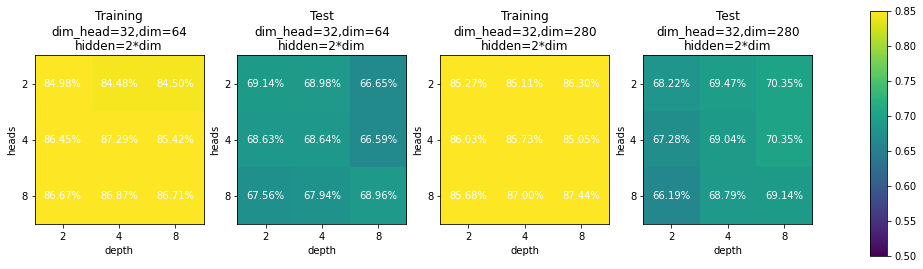

[[0.68014443 0.69871068 0.69489425]
 [0.68550801 0.68292934 0.70469314]
 [0.69169676 0.69695717 0.68849921]]
Dropout 0.2 emb_dropout 0


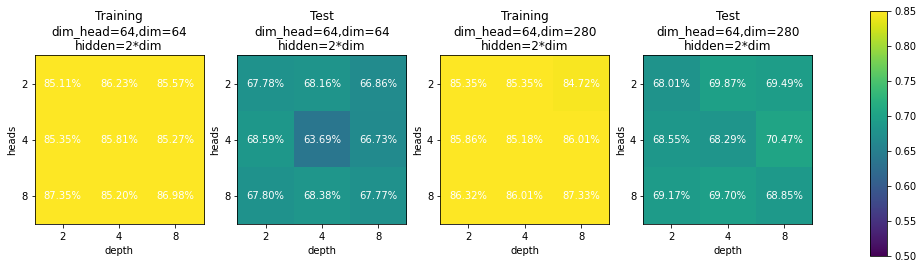

[[0.70159876 0.68138218 0.6906653 ]
 [0.70252705 0.68437338 0.69891697]
 [0.67488396 0.71108818 0.70985043]]
Dropout 0.2 emb_dropout 0


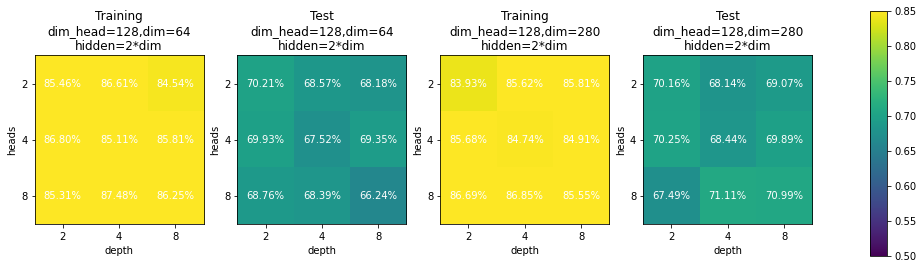

[[0.69210935 0.67839092 0.70603406]
 [0.67818463 0.6963383  0.69107789]
 [0.68705517 0.70582777 0.68117589]]
Dropout 0.2 emb_dropout 0.2


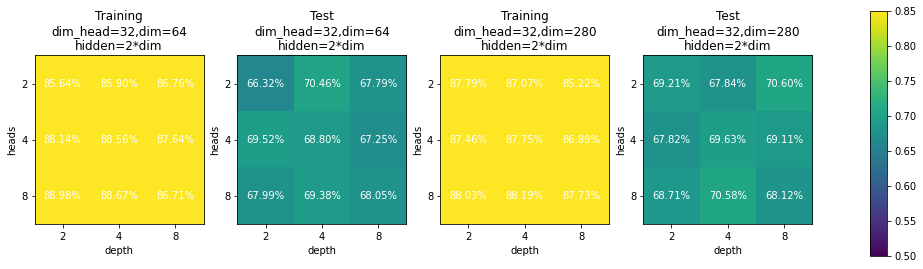

[[0.67261475 0.68292934 0.67787522]
 [0.6881898  0.70232075 0.68334192]
 [0.68994325 0.68746775 0.69355339]]
Dropout 0.2 emb_dropout 0.2


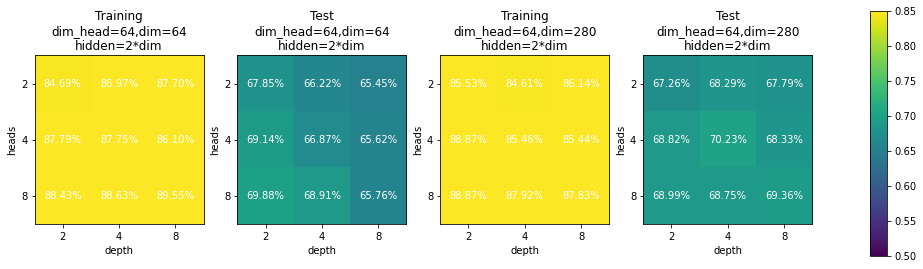

[[0.69200617 0.67663747 0.68437338]
 [0.67921609 0.6743682  0.65177929]
 [0.70386797 0.6839608  0.65146983]]
Dropout 0.2 emb_dropout 0.2


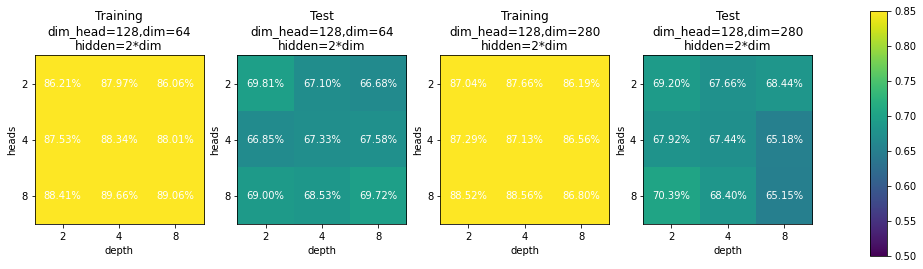

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.2 emb_dropout 0.4


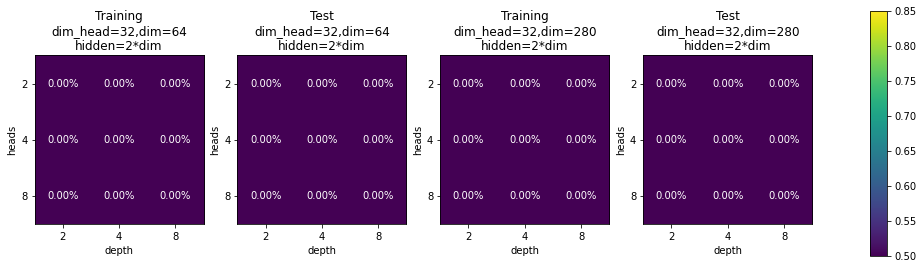

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.2 emb_dropout 0.4


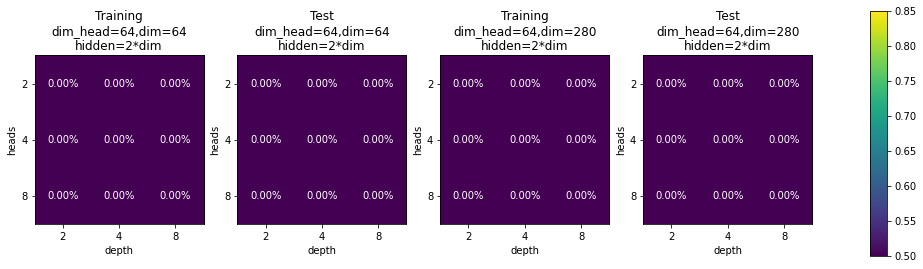

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.2 emb_dropout 0.4


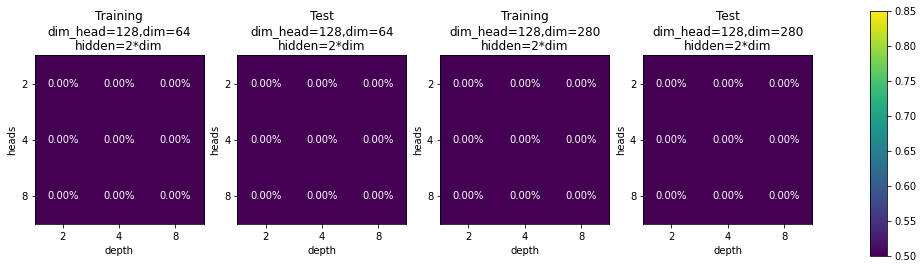

[[0.68014443 0.66498196 0.70056731]
 [0.67612171 0.68313563 0.69231564]
 [0.68715835 0.66250646 0.68138218]]
Dropout 0.4 emb_dropout 0


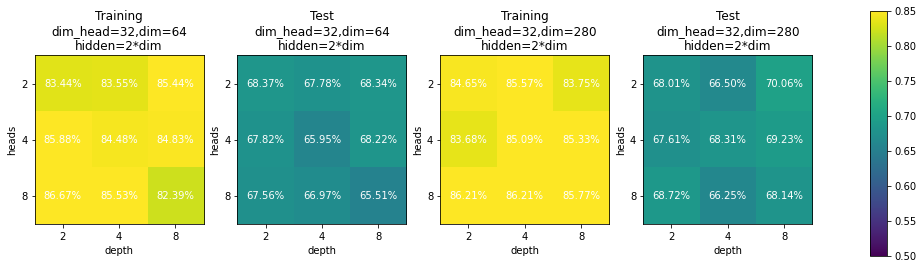

[[0.68901497 0.68674576 0.67591542]
 [0.6790098  0.66982979 0.69417226]
 [0.68241364 0.65982467 0.68963385]]
Dropout 0.4 emb_dropout 0


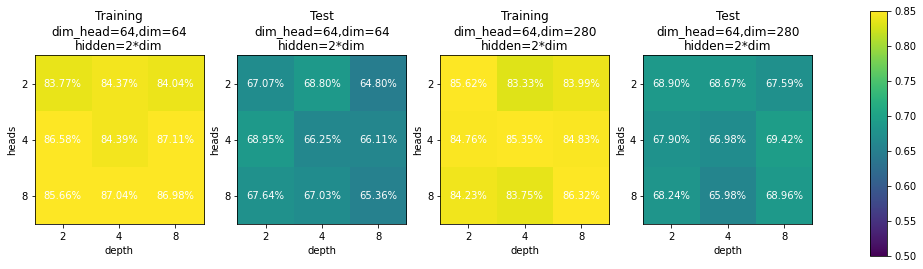

[[0.70201135 0.67622489 0.69417226]
 [0.69045901 0.6982981  0.6913873 ]
 [0.71490461 0.70603406 0.70046413]]
Dropout 0.4 emb_dropout 0


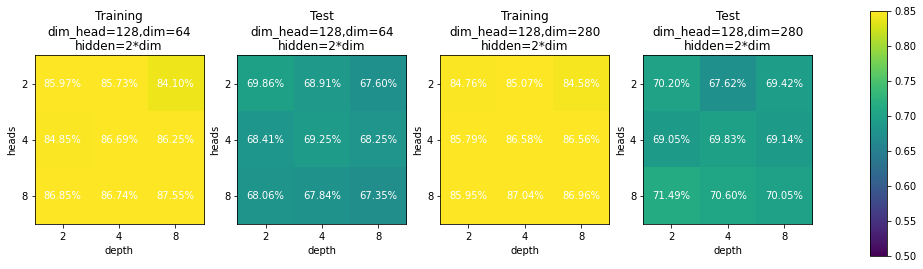

[[0.67890668 0.66982979 0.69221246]
 [0.66498196 0.6980918  0.66982979]
 [0.67818463 0.69293451 0.69169676]]
Dropout 0.4 emb_dropout 0.2


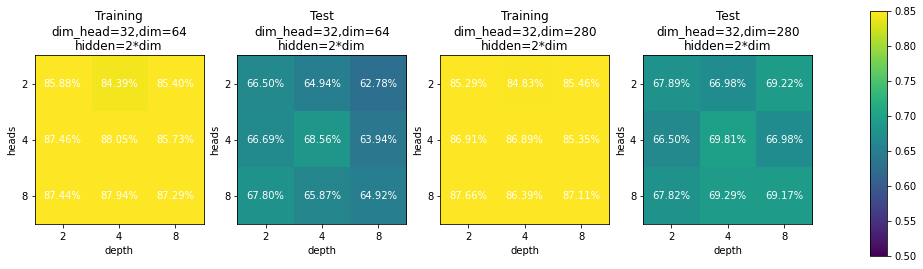

[[0.68623    0.68684888 0.67746264]
 [0.696132   0.65188241 0.65786487]
 [0.67839092 0.68901497 0.69159359]]
Dropout 0.4 emb_dropout 0.2


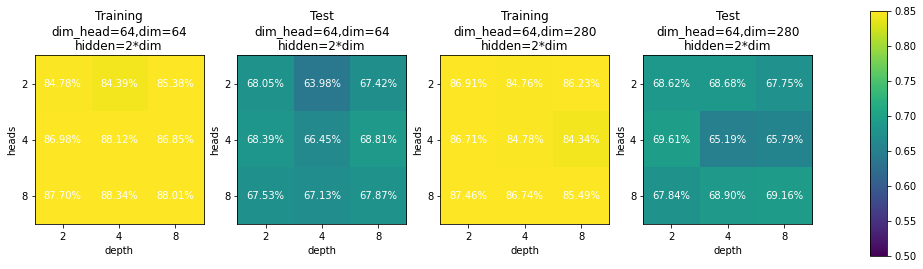

[[0.6958226  0.661475   0.64301187]
 [0.68488914 0.65817434 0.66993296]
 [0.691181   0.68169159 0.66487879]]
Dropout 0.4 emb_dropout 0.2


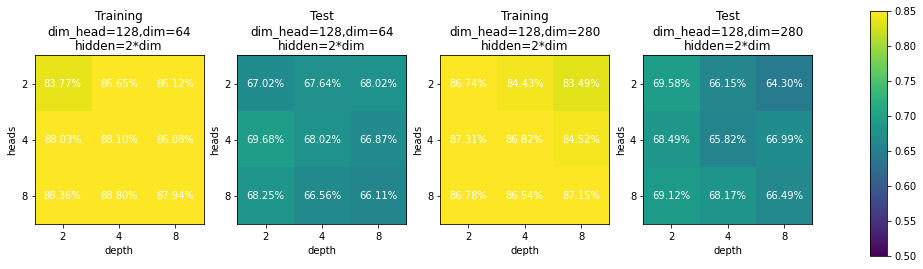

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.4 emb_dropout 0.4


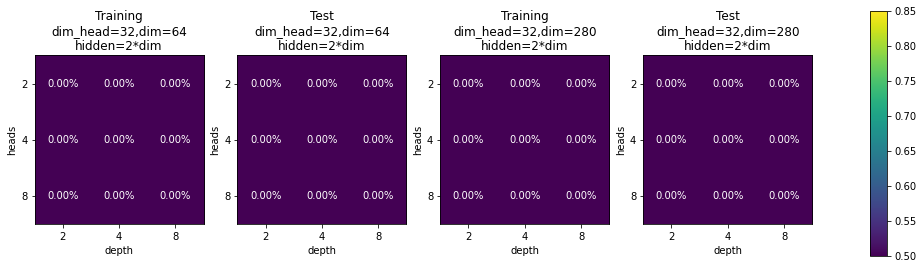

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.4 emb_dropout 0.4


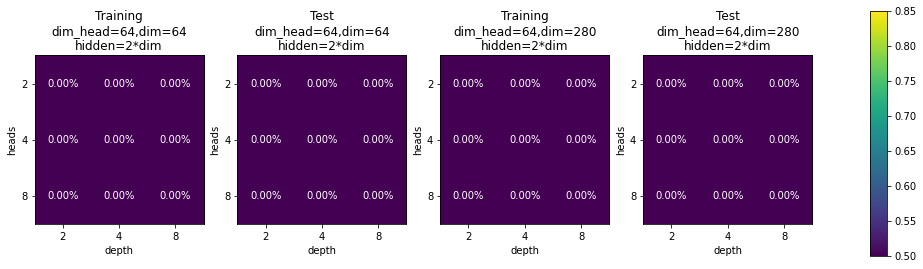

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.4 emb_dropout 0.4


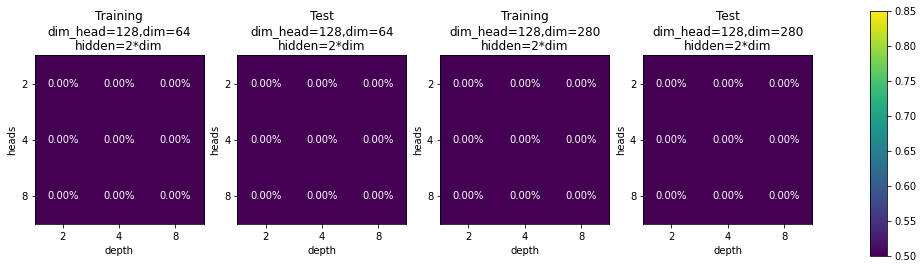

In [3]:
plot_file('results_1623301957.pickle')

[[0.68220735 0.69468796 0.70345539]
 [0.67282104 0.69035584 0.70345539]
 [0.66188759 0.68788034 0.6913873 ]]
Dropout 0.2 emb_dropout 0


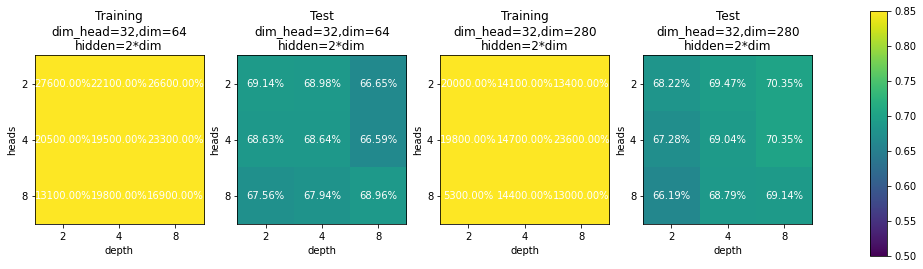

[[0.68014443 0.69871068 0.69489425]
 [0.68550801 0.68292934 0.70469314]
 [0.69169676 0.69695717 0.68849921]]
Dropout 0.2 emb_dropout 0


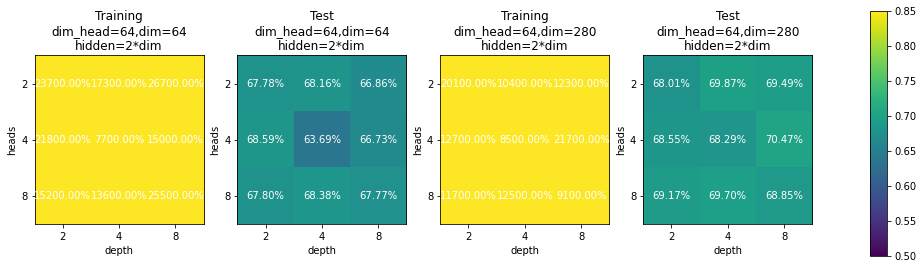

[[0.70159876 0.68138218 0.6906653 ]
 [0.70252705 0.68437338 0.69891697]
 [0.67488396 0.71108818 0.70985043]]
Dropout 0.2 emb_dropout 0


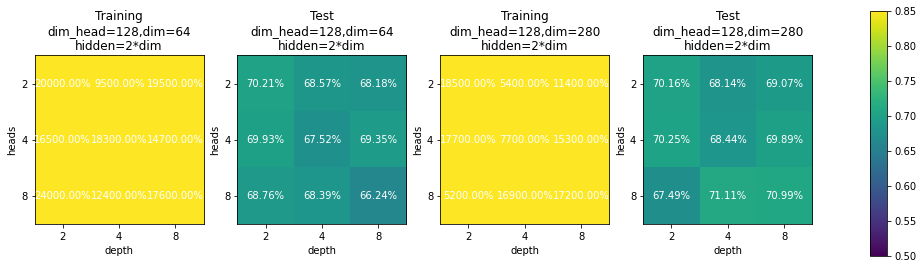

[[0.69210935 0.67839092 0.70603406]
 [0.67818463 0.6963383  0.69107789]
 [0.68705517 0.70582777 0.68117589]]
Dropout 0.2 emb_dropout 0.2


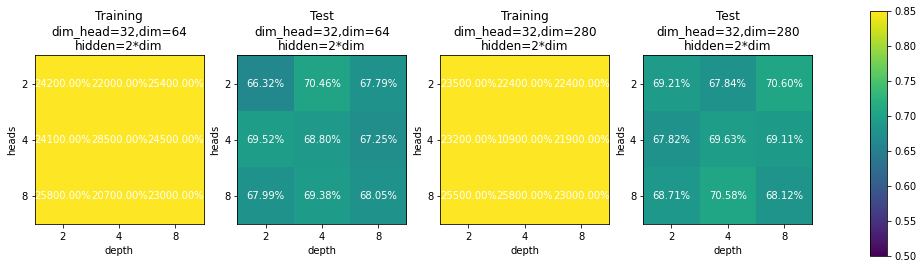

[[0.67261475 0.68292934 0.67787522]
 [0.6881898  0.70232075 0.68334192]
 [0.68994325 0.68746775 0.69355339]]
Dropout 0.2 emb_dropout 0.2


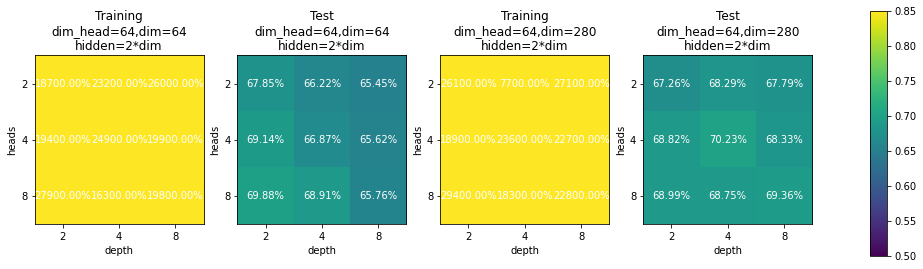

[[0.69200617 0.67663747 0.68437338]
 [0.67921609 0.6743682  0.65177929]
 [0.70386797 0.6839608  0.65146983]]
Dropout 0.2 emb_dropout 0.2


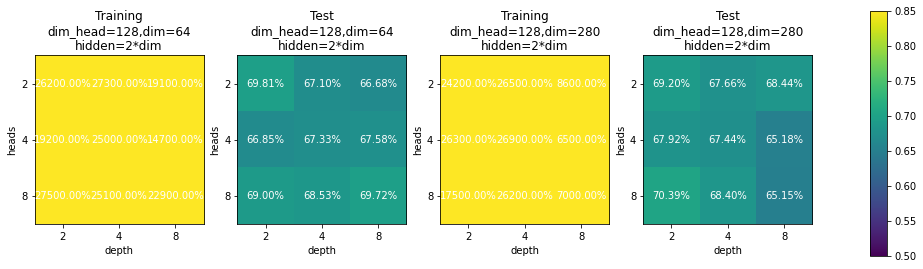

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.2 emb_dropout 0.4


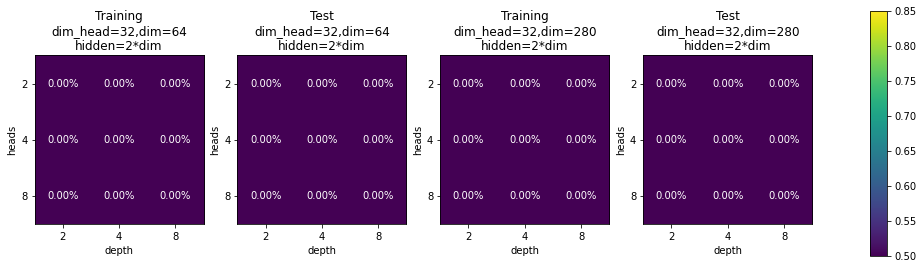

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.2 emb_dropout 0.4


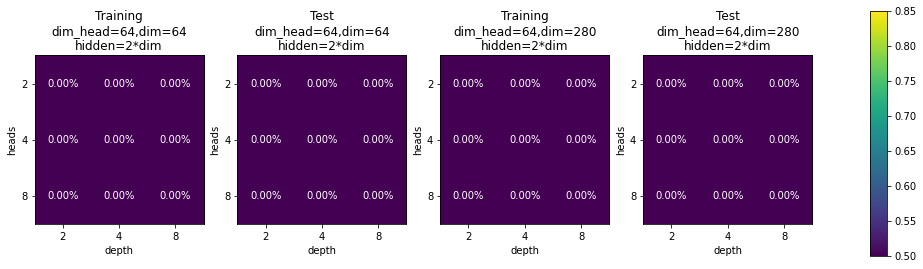

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.2 emb_dropout 0.4


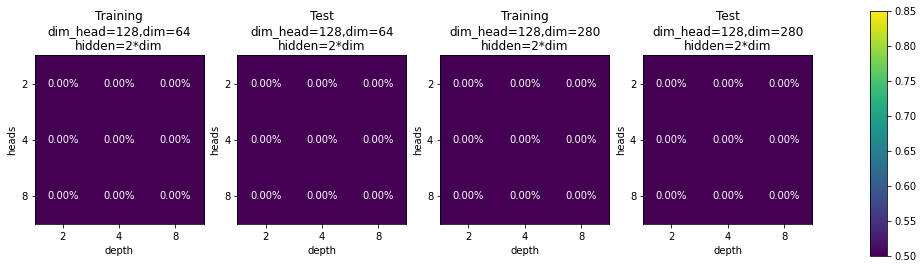

[[0.68014443 0.66498196 0.70056731]
 [0.67612171 0.68313563 0.69231564]
 [0.68715835 0.66250646 0.68138218]]
Dropout 0.4 emb_dropout 0


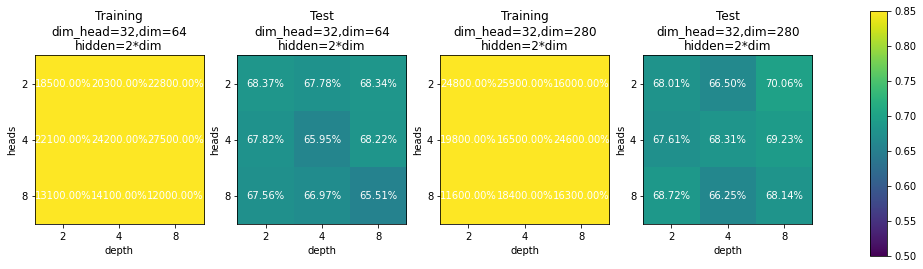

[[0.68901497 0.68674576 0.67591542]
 [0.6790098  0.66982979 0.69417226]
 [0.68241364 0.65982467 0.68963385]]
Dropout 0.4 emb_dropout 0


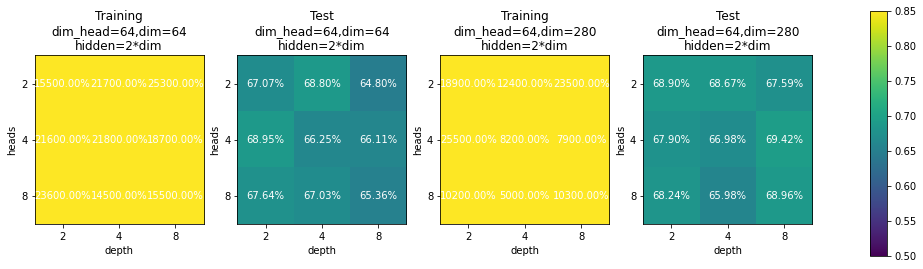

[[0.70201135 0.67622489 0.69417226]
 [0.69045901 0.6982981  0.6913873 ]
 [0.71490461 0.70603406 0.70046413]]
Dropout 0.4 emb_dropout 0


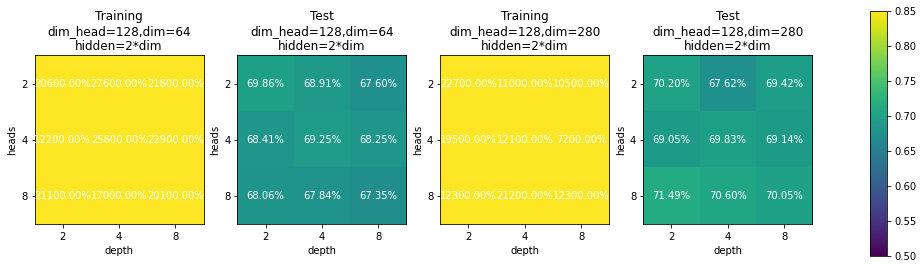

[[0.67890668 0.66982979 0.69221246]
 [0.66498196 0.6980918  0.66982979]
 [0.67818463 0.69293451 0.69169676]]
Dropout 0.4 emb_dropout 0.2


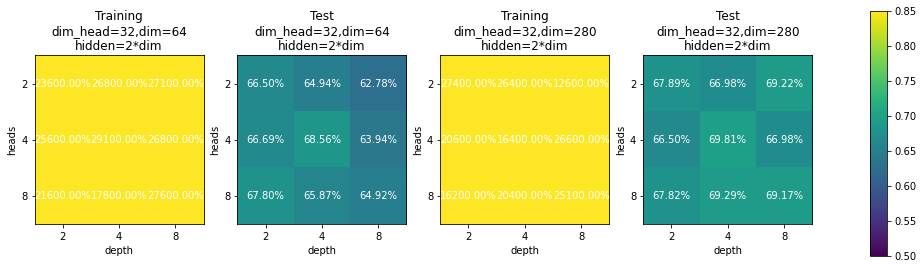

[[0.68623    0.68684888 0.67746264]
 [0.696132   0.65188241 0.65786487]
 [0.67839092 0.68901497 0.69159359]]
Dropout 0.4 emb_dropout 0.2


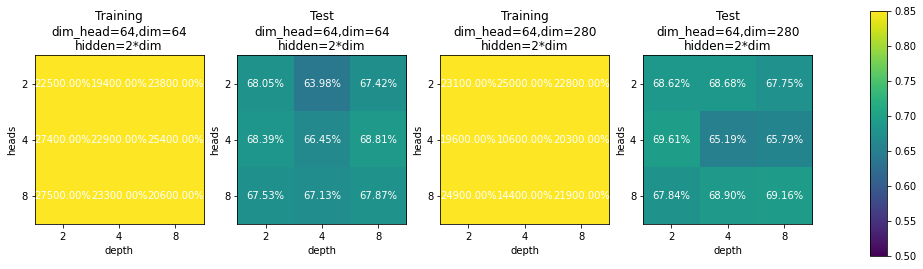

[[0.6958226  0.661475   0.64301187]
 [0.68488914 0.65817434 0.66993296]
 [0.691181   0.68169159 0.66487879]]
Dropout 0.4 emb_dropout 0.2


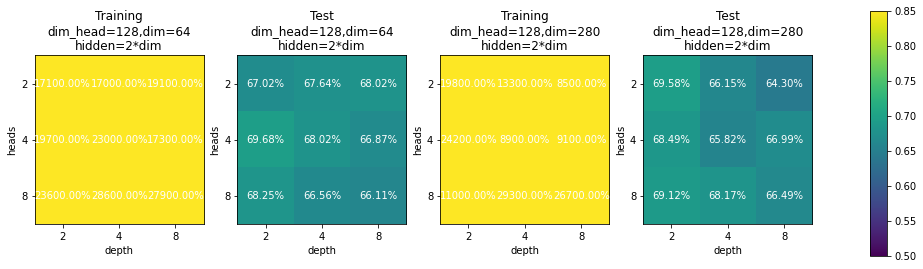

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.4 emb_dropout 0.4


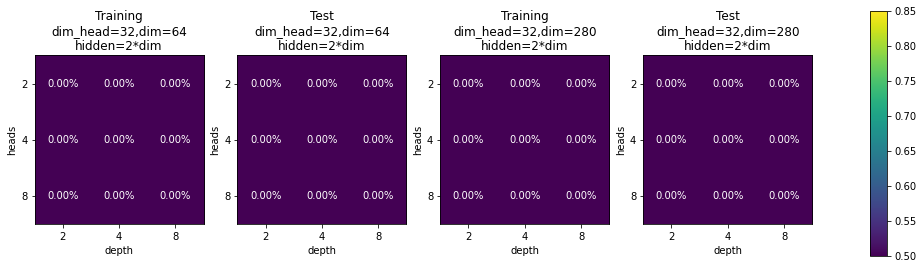

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.4 emb_dropout 0.4


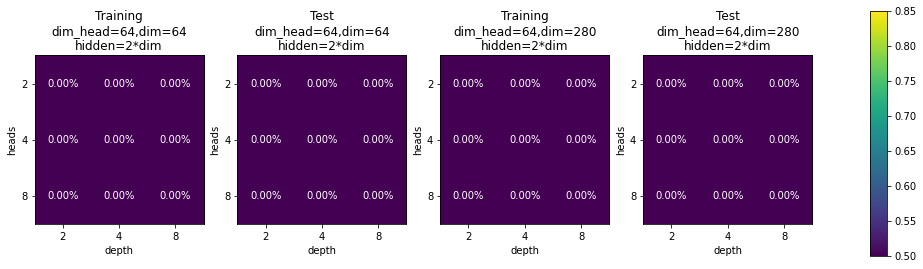

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dropout 0.4 emb_dropout 0.4


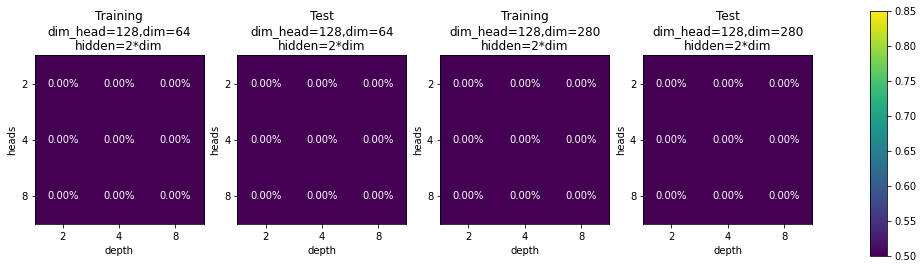

In [4]:
plot_file_epoch('results_1623301957.pickle')

In [17]:
def plot_file2(file, dim=128):
    configs, n_params_, losses_accs_ = load(open(file, 'rb'))

    losses_accs_df = list(map(lambda x: pd.DataFrame(x), losses_accs_))

    configs_df = pd.DataFrame(configs)

    heads = [2, 4, 8]
    depth = [2, 4, 8,]
    
    for dim_head in [32, 64, 128]:

        scores_val = np.zeros((3,3))
        scores_test = np.zeros((3,3))
        scores_val_2x = np.zeros((3,3))
        scores_test_2x = np.zeros((3,3))

        for i, config in enumerate(configs):
            if config['dim_head'] == dim_head and config['dim'] == dim and config['mlp_dim'] == dim :
                scores_val[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()
                scores_test[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]
            if config['dim_head'] == dim_head and config['dim'] == dim and config['mlp_dim'] == 2 * dim:
                scores_val_2x[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()
                scores_test_2x[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]

        fig, axes = plt.subplots(figsize=(8*2, 4), ncols=4)
        print(scores_test)
        for idx, scores in enumerate([scores_val, scores_test, scores_val_2x, scores_test_2x]):
            ax = axes[idx]
            m = ax.imshow(scores, interpolation='nearest',  vmin=.5, vmax=.85)#cmap=plt.cm.hot)
            ax.set_ylabel('heads')
            ax.set_xlabel('depth')

            ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(len(heads))))
            ax.xaxis.set_major_formatter(ticker.FixedFormatter(heads))
            ax.yaxis.set_major_locator(ticker.FixedLocator(np.arange(len(depth))))
            ax.yaxis.set_major_formatter(ticker.FixedFormatter(depth))

            ax.set_title(f'{"Training" if idx % 2 == 0 else "Test"}\ndim_head={dim_head},dim={dim}\nhidden={dim if idx < 2 else 2*dim}')
            for i in range(len(heads)):
                for j in range(len(depth)):
                    text = ax.text(j, i, f"{scores[i, j]*100:.2f}%",
                                   ha="center", va="center", color="w")

        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.1, 0.015, 0.85])
        fig.colorbar(m, cax=cbar_ax)

        plt.show()

[[0.67044866 0.6669417  0.66859204]
 [0.68540484 0.66137183 0.67777205]
 [0.676328   0.68623    0.69283134]]


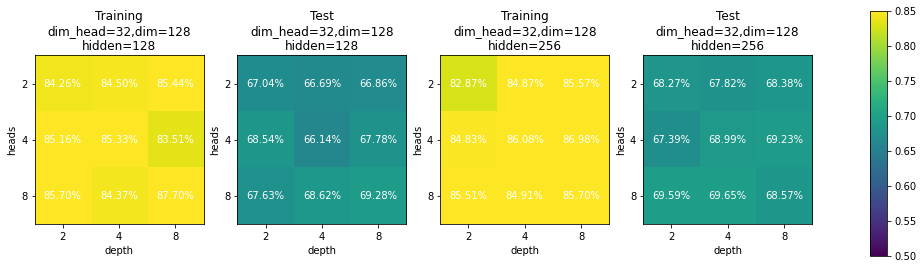

[[0.66343474 0.6982981  0.65363592]
 [0.68942755 0.67478079 0.69850439]
 [0.68365139 0.66333163 0.7076844 ]]


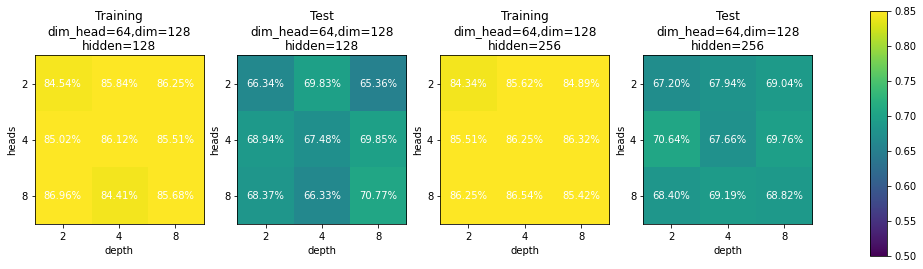

[[0.69675088 0.65590513 0.65425479]
 [0.66972667 0.69355339 0.69427538]
 [0.6889118  0.70335227 0.68942755]]


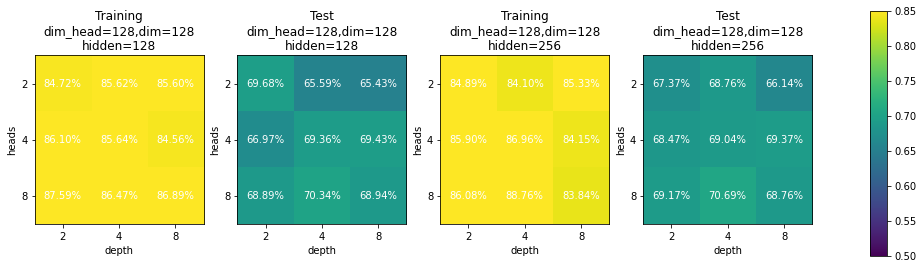

In [18]:
plot_file2("results_1623371380.pickle", dim=128)

[[0.69499743 0.69272822 0.69788551]
 [0.69169676 0.6864363  0.67478079]
 [0.67715317 0.69530684 0.70242393]]


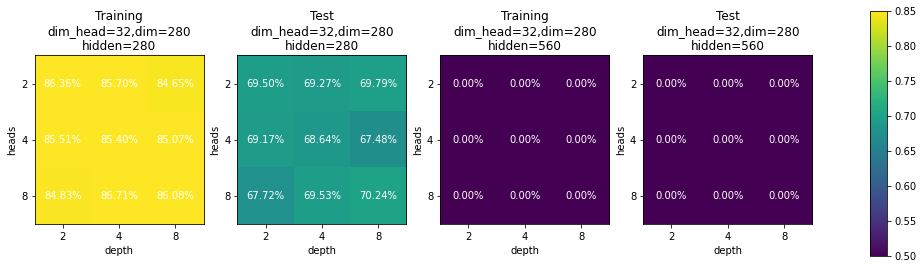

[[0.6988138  0.67034554 0.68674576]
 [0.68158847 0.69241875 0.7027334 ]
 [0.69448167 0.70376486 0.67364621]]


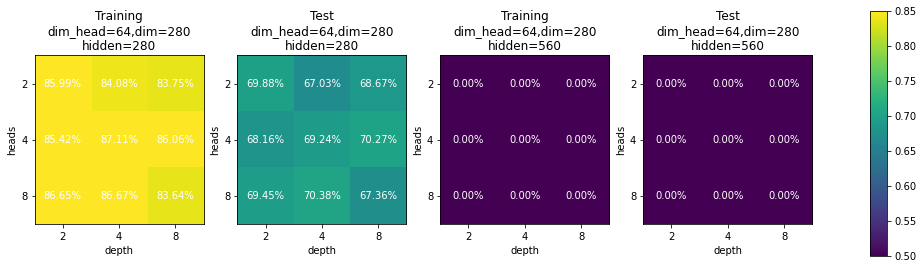

[[0.67478079 0.70252705 0.70892215]
 [0.68736464 0.6913873  0.66477567]
 [0.66456938 0.69551313 0.69747293]]


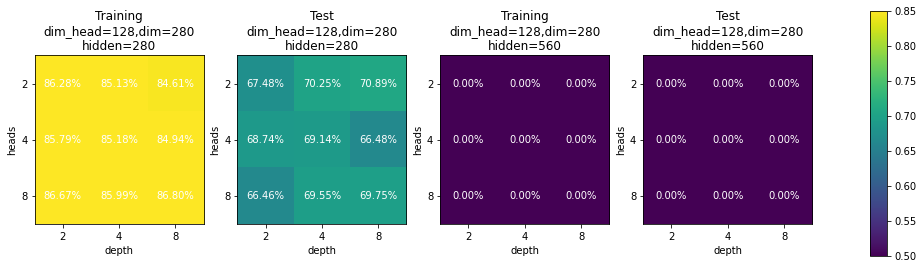

In [19]:
plot_file2("results_1623371380.pickle", dim=280)